<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

import os

Initialisation
==============

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

Library,Version
OS,posix [linux]
Python,"3.8.1 (default, Jan 8 2020, 23:09:20) [GCC 9.2.0]"
IPython,7.11.1
MatPlotLib,3.1.2
Numpy,1.18.1
pyAgrum,0.16.4.9


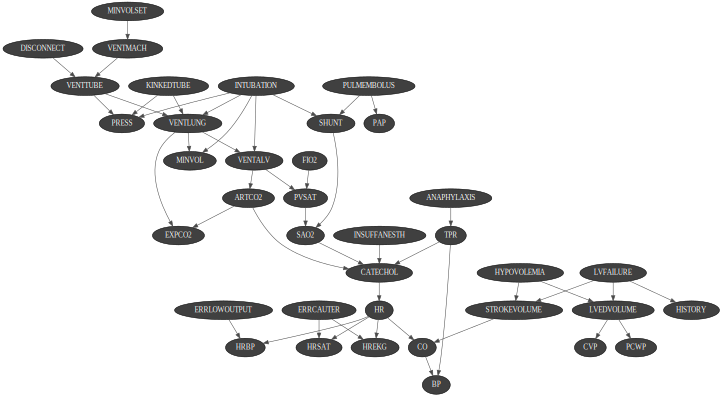

In [3]:
bn=gum.loadBN(os.path.join("res","alarm.dsl"))
gnb.showBN(bn,size='10')

Visualisation and inspection
============================

In [4]:
print(bn.variableFromName('SHUNT'))

SHUNT<NORMAL,HIGH>


In [5]:
print(bn.cpt(bn.idFromName('SHUNT')))

<SHUNT:NORMAL|PULMEMBOLUS:TRUE|INTUBATION:NORMAL> :: 0.1 /<SHUNT:HIGH|PULMEMBOLUS:TRUE|INTUBATION:NORMAL> :: 0.9 /<SHUNT:NORMAL|PULMEMBOLUS:FALSE|INTUBATION:NORMAL> :: 0.95 /<SHUNT:HIGH|PULMEMBOLUS:FALSE|INTUBATION:NORMAL> :: 0.05 /<SHUNT:NORMAL|PULMEMBOLUS:TRUE|INTUBATION:ESOPHAGEAL> :: 0.1 /<SHUNT:HIGH|PULMEMBOLUS:TRUE|INTUBATION:ESOPHAGEAL> :: 0.9 /<SHUNT:NORMAL|PULMEMBOLUS:FALSE|INTUBATION:ESOPHAGEAL> :: 0.95 /<SHUNT:HIGH|PULMEMBOLUS:FALSE|INTUBATION:ESOPHAGEAL> :: 0.05 /<SHUNT:NORMAL|PULMEMBOLUS:TRUE|INTUBATION:ONESIDED> :: 0.01 /<SHUNT:HIGH|PULMEMBOLUS:TRUE|INTUBATION:ONESIDED> :: 0.99 /<SHUNT:NORMAL|PULMEMBOLUS:FALSE|INTUBATION:ONESIDED> :: 0.05 /<SHUNT:HIGH|PULMEMBOLUS:FALSE|INTUBATION:ONESIDED> :: 0.95


In [6]:
gnb.showPotential(bn.cpt(bn.idFromName('SHUNT')),digits=3)

Results of inference
====================

It is easy to look at result of inference

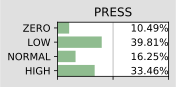

In [7]:
gnb.showPosterior(bn,{'SHUNT':'HIGH'},'PRESS')

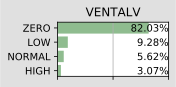

In [8]:
gnb.showPosterior(bn,{'MINVOLSET':'NORMAL'},'VENTALV')

Overall results

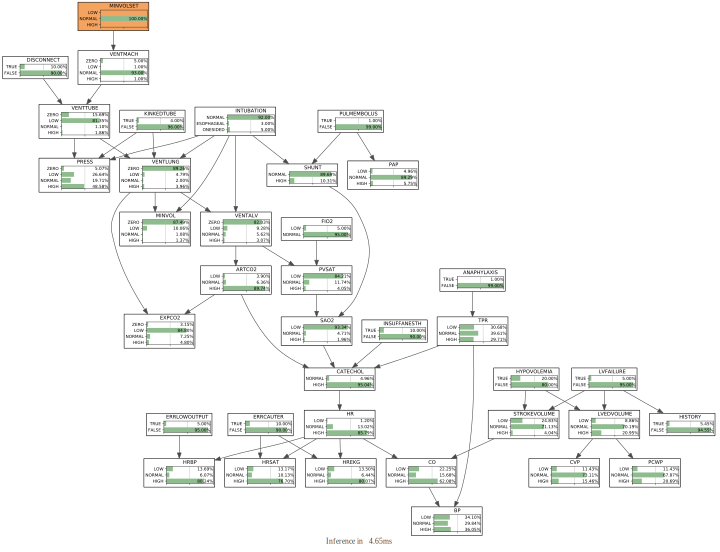

In [9]:
gnb.showInference(bn,size="10",evs={'MINVOLSET':'NORMAL'})

What is the impact of observed variables (SHUNT and VENTALV for instance) on another on (PRESS) ?

In [10]:
ie=gum.LazyPropagation(bn)
ie.evidenceImpact('PRESS',['SHUNT','VENTALV'])

(gum::Potential<double>@0x55e2215481c0) <PRESS:ZERO|VENTALV:ZERO|SHUNT:NORMAL> :: 0.0569134 /<PRESS:LOW|VENTALV:ZERO|SHUNT:NORMAL> :: 0.266855 /<PRESS:NORMAL|VENTALV:ZERO|SHUNT:NORMAL> :: 0.200497 /<PRESS:HIGH|VENTALV:ZERO|SHUNT:NORMAL> :: 0.475735 /<PRESS:ZERO|VENTALV:LOW|SHUNT:NORMAL> :: 0.0207779 /<PRESS:LOW|VENTALV:LOW|SHUNT:NORMAL> :: 0.251462 /<PRESS:NORMAL|VENTALV:LOW|SHUNT:NORMAL> :: 0.0553331 /<PRESS:HIGH|VENTALV:LOW|SHUNT:NORMAL> :: 0.672427 /<PRESS:ZERO|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.0769169 /<PRESS:LOW|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.3267 /<PRESS:NORMAL|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.17722 /<PRESS:HIGH|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.419163 /<PRESS:ZERO|VENTALV:HIGH|SHUNT:NORMAL> :: 0.0500507 /<PRESS:LOW|VENTALV:HIGH|SHUNT:NORMAL> :: 0.163277 /<PRESS:NORMAL|VENTALV:HIGH|SHUNT:NORMAL> :: 0.27958 /<PRESS:HIGH|VENTALV:HIGH|SHUNT:NORMAL> :: 0.507092 /<PRESS:ZERO|VENTALV:ZERO|SHUNT:HIGH> :: 0.058853 /<PRESS:LOW|VENTALV:ZERO|SHUNT:HIGH> :: 0.272637 /<PRESS:NORMAL|VENTALV:ZERO|SHUNT:HIGH> :: 0.199715 /<PRESS:HIGH|VENTALV:ZERO|SHUNT:HIGH> :: 0.468795 /<PRESS:ZERO|VENTALV:LOW|SHUNT:HIGH> :: 0.0318351 /<PRESS:LOW|VENTALV:LOW|SHUNT:HIGH> :: 0.223691 /<PRESS:NORMAL|VENTALV:LOW|SHUNT:HIGH> :: 0.0520906 /<PRESS:HIGH|VENTALV:LOW|SHUNT:HIGH> :: 0.692384 /<PRESS:ZERO|VENTALV:NORMAL|SHUNT:HIGH> :: 0.173498 /<PRESS:LOW|VENTALV:NORMAL|SHUNT:HIGH> :: 0.583865 /<PRESS:NORMAL|VENTALV:NORMAL|SHUNT:HIGH> :: 0.140246 /<PRESS:HIGH|VENTALV:NORMAL|SHUNT:HIGH> :: 0.102391 /<PRESS:ZERO|VENTALV:HIGH|SHUNT:HIGH> :: 0.0710585 /<PRESS:LOW|VENTALV:HIGH|SHUNT:HIGH> :: 0.234708 /<PRESS:NORMAL|VENTALV:HIGH|SHUNT:HIGH> :: 0.253271 /<PRESS:HIGH|VENTALV:HIGH|SHUNT:HIGH> :: 0.440962

Using inference as a function
====================

It is also easy to use inference as a routine in more complex procedures.

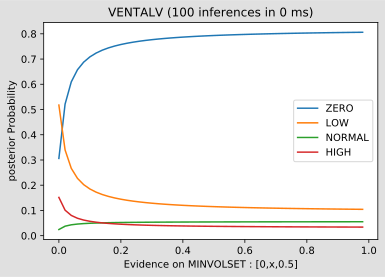

In [11]:
import time
r=range(0,100,2)
xs=[x/100.0 for x in r]

tf=time.time()
ys=[gum.getPosterior(bn,{'MINVOLSET':[0,x/100.0,0.5]},'VENTALV').tolist() 
        for x in r]
delta=time.time()-tf

p=plot(xs,ys)
legend(p,[bn.variableFromName('VENTALV').label(i) 
          for i in range(bn.variableFromName('VENTALV').domainSize())],loc=7);
title('VENTALV (100 inferences in %d ms)'%delta);
ylabel('posterior Probability');
xlabel('Evidence on MINVOLSET : [0,x,0.5]');

Another example : python gives access to a large set of tools. Here the value for the equality of two probabilities of a posterior is easely computed.

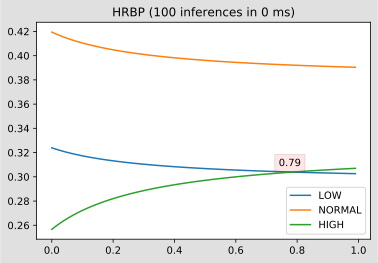

In [12]:
x=[p/100.0 for p in range(0,100)]

tf=time.time()
y=[gum.getPosterior(bn,{'HRBP':[1.0-p/100.0,1.0-p/100.0,p/100.0]},'TPR').tolist() 
   for p in range(0,100)]
delta=time.time()-tf

p=plot(x,y)
title('HRBP (100 inferences in %d ms)'%delta);
v=bn.variableFromName('TPR');
legend([v.label(i) for i in range(v.domainSize())],loc='best');
np1=(transpose(y)[0]>transpose(y)[2]).argmin()
text(x[np1]-0.05,y[np1][0]+0.005,str(x[np1]),bbox=dict(facecolor='red', alpha=0.1));

BN as a classifier
================

Generation of databases
-----------------------

Using the CSV format for the database:

In [13]:
from pyAgrum.lib.bn2csv import generateCSV
generateCSV(bn,os.path.join("out","test.csv"),1000,visible=True)

** The library 'gum.lib.bn2csv' is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
** The function 'gum.lib.bn2csv.generateCSV' is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
** Class 'CSVGenerator' is is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
 out/test.csv : [ ############################################################ ] 100%
Log2-Likelihood : -15095.658121016384



-15095.658121016384

In [14]:
from pyAgrum.lib._utils import oslike
oslike.head(os.path.join("out",'test.csv'))

ANAPHYLAXIS,TPR,DISCONNECT,LVFAILURE,HISTORY,FIO2,ERRCAUTER,ERRLOWOUTPUT,INSUFFANESTH,PULMEMBOLUS,PAP,MINVOLSET,VENTMACH,VENTTUBE,INTUBATION,SHUNT,HYPOVOLEMIA,STROKEVOLUME,LVEDVOLUME,PCWP,CVP,KINKEDTUBE,VENTLUNG,MINVOL,VENTALV,ARTCO2,EXPCO2,PVSAT,SAO2,CATECHOL,HR,CO,BP,HRSAT,HREKG,HRBP,PRESS
FALSE,NORMAL,FALSE,FALSE,FALSE,NORMAL,FALSE,FALSE,FALSE,FALSE,NORMAL,NORMAL,NORMAL,LOW,NORMAL,NORMAL,FALSE,HIGH,NORMAL,NORMAL,NORMAL,FALSE,ZERO,ZERO,ZERO,HIGH,ZERO,LOW,LOW,HIGH,HIGH,HIGH,HIGH,NORMAL,HIGH,HIGH,LOW
FALSE,HIGH,FALSE,FALSE,FALSE,NORMAL,TRUE,TRUE,FALSE,FALSE,NORMAL,HIGH,HIGH,HIGH,NORMAL,NORMAL,TRUE,LOW,HIGH,HIGH,HIGH,FALSE,ZERO,ZERO,ZERO,HIGH,LOW,LOW,LOW,HIGH,NORMAL,LOW,LOW,NORMAL,LOW,LOW,HIGH
FALSE,HIGH,FALSE,FALSE,FALSE,NORMAL,FALSE,FALSE,FALSE,FALSE,NORMAL,NORMAL,NORMAL,LOW,NORMAL,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,NORMAL,FALSE,ZERO,ZERO,ZERO,HIGH,LOW,LOW,LOW,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,NORMAL
FALSE,NORMAL,FALSE,FALSE,FALSE,NORMAL,FALSE,FALSE,FALSE,FALSE,LOW,NORMAL,NORMAL,LOW,O

BN as a classifier
------------------

(because of the use of from-bn-generated csv files, quite good ROC curves are expected)

 out/test.csv : [ ############################################################ ] 100%
 result in out/test.csv-ROC_alarm.dsl-CATECHOL-HIGH.png


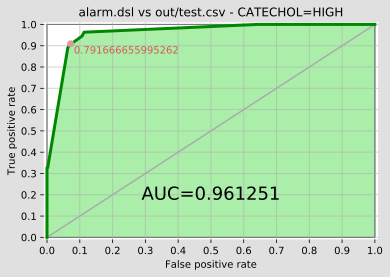

In [15]:
from pyAgrum.lib.bn2roc import showROC

showROC(bn,os.path.join("out","test.csv"),
        variable='CATECHOL',label='HIGH',  # class and label 
        visible=True,show_fig=True,with_labels=True)        

Using another class variable

 out/test.csv : [ ############################################################ ] 100%
 result in out/test.csv-ROC_alarm.dsl-SAO2-HIGH.png


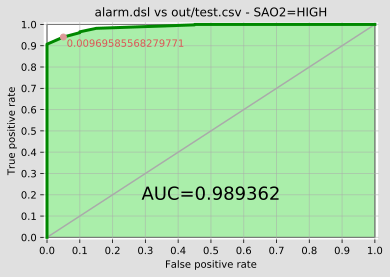

In [16]:
showROC(bn,os.path.join("out","test.csv"),'SAO2','HIGH',visible=True)

# Fast prototyping for BNs

In [17]:
bn1=gum.fastBN("a->b;a->c;b->c;c->d",3)

gnb.sideBySide(*[gnb.getInference(bn1,evs={'c':val},targets={'a','c','d'}) for val in range(3)],
              captions=["<pre>Inference given that c={}</pre>".format(val) for val in range(3)])

Inference given that c=0,Inference given that c=1,Inference given that c=2


In [18]:
print(gum.getPosterior(bn1,evs={'c':0},target='c'))
print(gum.getPosterior(bn1,evs={'c':0},target='a'))

<c:0> :: 1 /<c:1> :: 0 /<c:2> :: 0
<a:0> :: 0.0967445 /<a:1> :: 0.284672 /<a:2> :: 0.618583


# Joint posterior, impact of multiple evidence

In [19]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
gnb.sideBySide(bn,gnb.getInference(bn))

In [20]:
ie=gum.LazyPropagation(bn)
ie.addJointTarget({"e","f","g"})
ie.makeInference()
gnb.sideBySide(ie.jointPosterior({"e","f","g"}),ie.jointPosterior({"e","g"}),
               captions=["Joint posterior $P(e,f,g)$","Joint posterior $P(e,f)$"])

In [21]:
gnb.sideBySide(ie.evidenceImpact("a",["e","f"]),ie.evidenceImpact("a",["d","e","f"]),
              captions=["$\\forall e,f, P(a|e,f)$",
                        "$\\forall d,e,f, P(a|d,e,f)=P(a|d,e)$ using d-separation"]
                        )

In [22]:
gnb.sideBySide(ie.evidenceJointImpact(["a","b"],["e","f"]),ie.evidenceJointImpact(["a","b"],["d","e","f"]),
              captions=["$\\forall e,f, P(a,b|e,f)$",
                        "$\\forall d,e,f, P(a,b|d,e,f)=P(a,b|d,e)$ using d-separation"]
                        )